In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.fft import fft
import matplotlib.pyplot as plt

In [2]:
# parameters
zeta = 0.05    # damping ratio
omega_0 = 1.0  # natural frequency
epsilon = 0.1  # amplitude of frequency modulation
omega_d = 2.0  # driving frequency


# initial conditions
y0 = [0.0, 1.0]

# time domain
t_span = [0, 50]
t_N    = 500

In [3]:
# the differential equation system
def oscillator(t, y):
    omega = omega_0 * (1 + epsilon * np.cos(omega_d * t))
    dydt = [y[1], -2 * zeta * omega * y[1] - omega**2 * y[0]]
    return dydt

In [4]:
# solve the differential equation
sol = solve_ivp(oscillator, t_span, y0, dense_output=True)

# create an array of times for which to evaluate the solution
t = np.linspace(t_span[0], t_span[1], t_N)

# evaluate the solution at the times in the array
y = sol.sol(t)

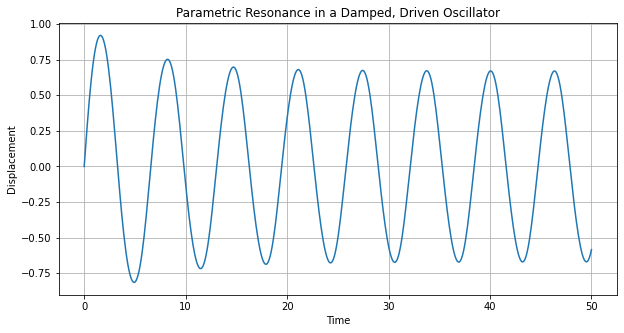

In [5]:
# plot the solution
plt.figure(figsize=(10, 5))
plt.plot(t, y[0])
plt.title('Parametric Resonance in a Damped, Driven Oscillator')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid()
plt.show()

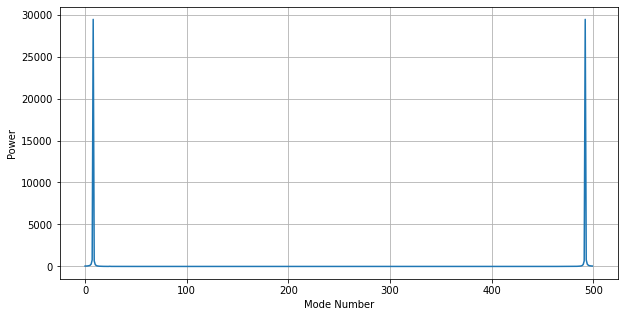

In [6]:
# compute the Fourier transform of the solution
yf  = fft(y[0])
#yft = [sum(np.abs(fft(y[i]))**2) for i in range(0,t_N)]

# plot the "occupation number" of each mode over time
plt.figure(figsize=(10, 5))
plt.plot(np.abs(yf)**2)
#plt.plot(yft)
plt.xlabel('Mode Number')
plt.ylabel('Power')
plt.grid()
plt.show()